In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from pathlib import Path
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv



In [2]:
load_dotenv()

True

In [3]:
 # Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [4]:
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["TD","BMO","BNS", "RY", "SP"]
timeframe = "1Day"


# Get 4 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-05-01 04:00:00+00:00,71.05,71.3100,70.53,70.53,363908,3874,70.877405,BMO
2017-05-02 04:00:00+00:00,70.52,70.5200,69.60,69.91,562050,5152,69.892124,BMO
2017-05-03 04:00:00+00:00,69.67,70.2700,69.47,69.83,557917,5284,69.833733,BMO
2017-05-04 04:00:00+00:00,69.96,70.0000,69.33,69.37,446609,4331,69.567808,BMO
2017-05-05 04:00:00+00:00,69.44,70.7300,69.44,70.54,448913,4378,70.306077,BMO
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,67.64,68.3604,67.64,67.92,1065124,10083,68.039688,TD
2021-04-27 04:00:00+00:00,68.15,68.3000,67.71,68.15,943541,9369,68.089598,TD
2021-04-28 04:00:00+00:00,68.50,69.0602,68.21,68.77,2436313,13022,68.753764,TD


In [5]:
BMO = df_ticker[df_ticker["symbol"] == "BMO"].drop("symbol", axis=1)
TD = df_ticker[df_ticker["symbol"] == "TD"].drop("symbol", axis=1)
BNS = df_ticker[df_ticker["symbol"] == "BNS"].drop("symbol", axis=1)
RY = df_ticker[df_ticker["symbol"] == "RY"].drop("symbol", axis=1)
SP = df_ticker[df_ticker["symbol"] == "SP"].drop("symbol", axis=1)


df_ticker = pd.concat([BMO, TD, BNS, RY, SP], axis=1, keys=["BMO", "TD", "BNS", "RY", "SP"])
df_ticker

BMO                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2017-05-01 04:00:00+00:00  71.05  71.31  70.53  70.53   363908        3874   
2017-05-02 04:00:00+00:00  70.52  70.52  69.60  69.91   562050        5152   
2017-05-03 04:00:00+00:00  69.67  70.27  69.47  69.83   557917        5284   
2017-05-04 04:00:00+00:00  69.96  70.00  69.33  69.37   446609        4331   
2017-05-05 04:00:00+00:00  69.44  70.73  69.44  70.54   448913        4378   
...                          ...    ...    ...    ...      ...         ...   
2021-04-26 04:00:00+00:00  93.11  94.32  93.11  94.17  1437234        9825   
2021-04-27 04:00:00+00:00  94.50  94.50  93.64  94.23   720764        7810   
2021-04-28 04:00:00+00:00  94.60  95.32  94.36  95.05   717338        8052   
2021-04-29 04:00:00+00:00  95.62  95.99  95.24  95.58   867287        9240   
2021-04-30 04:00:00+00:00  94.38  94.77  93.93  94.34  1027791       10221   

                                         TD                  ...       RY  \
                                vwap   open     high    low  ...   volume   
timestamp                                                    ...            
2017-05-01 04:00:00+00:00  70.877405  47.23  47.3150  46.93  ...   991477   
2017-05-02 04:00:00+00:00  69.892124  46.96  47.0300  46.25  ...  1444647   
2017-05-03 04:00:00+00:00  69.833733  46.27  46.5960  45.79  ...  1095945   
2017-05-04 04:00:00+00:00  69.567808  46.49  46.5700  45.91  ...  1488767   
2017-05-05 04:00:00+00:00  70.306077  46.06  46.9700  45.88  ...  1081150   
...                              ...    ...      ...    ...  ...      ...   
2021-04-26 04:00:00+00:00  94.111858  67.64  68.3604  67.64  ...   839119   
2021-04-27 04:00:00+00:00  94.212880  68.15  68.3000  67.71  ...   858697   
2021-04-28 04:00:00+00:00  94.936556  68.50  69.0602  68.21  ...  2310513   
2021-04-29 04:00:00+00:00  95.550755  69.29  69.6300  69.03  ...   838951   
2021-04-30 04:00:00+00:00  94.349032  69.11  69.2500  68.67  ...  1135834   

                                                     SP                    \
                          trade_count       vwap   open     high      low   
timestamp                                                                   
2017-05-01 04:00:00+00:00        9075  68.490647  34.40  34.6500  32.6819   
2017-05-02 04:00:00+00:00       11083  67.673152  34.45  34.5000  33.7000   
2017-05-03 04:00:00+00:00        9970  67.520887  35.00  36.2000  31.8000   
2017-05-04 04:00:00+00:00       12781  67.592467  32.35  32.5000  31.3500   
2017-05-05 04:00:00+00:00        9355  68.425861  32.35  32.4000  31.1500   
...                               ...        ...    ...      ...      ...   
2021-04-26 04:00:00+00:00        9377  94.225018  33.21  34.0000  32.9300   
2021-04-27 04:00:00+00:00        9463  94.389730  33.52  34.8800  33.5200   
2021-04-28 04:00:00+00:00       12498  95.470482  34.60  35.0475  34.3400   
2021-04-29 04:00:00+00:00        9229  96.129051  35.12  36.3000  35.1200   
2021-04-30 04:00:00+00:00        9385  95.516708  35.51  35.8000  33.7900   

                                                                 
                           close  volume trade_count       vwap  
timestamp                                                        
2017-05-01 04:00:00+00:00  34.30  120472        1111  34.393175  
2017-05-02 04:00:00+00:00  34.10  147899        1816  33.993852  
2017-05-03 04:00:00+00:00  32.35  253284        2723  33.055612  
2017-05-04 04:00:00+00:00  32.35  130255        1628  31.965233  
2017-05-05 04:00:00+00:00  31.35  116969        1316  31.585767  
...                          ...     ...         ...        ...  
2021-04-26 04:00:00+00:00  33.49   83487        1533  33.388684  
2021-04-27 04:00:00+00:00  34.53  161221        2010  34.448236  
2021-04-28 04:00:00+00:00  34.46   84468        1490

In [6]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices

,TD,BMO,BNS,RY,SP
2017-05-01,46.98,70.53,55.40,68.20,34.30
2017-05-02,46.44,69.91,55.21,67.54,34.10
2017-05-03,46.28,69.83,55.13,67.65,32.35
2017-05-04,46.02,69.37,54.65,67.43,32.35
2017-05-05,46.95,70.54,56.19,68.68,31.35
...,...,...,...,...,...
2021-04-26,67.92,94.17,62.93,94.19,33.49
2021-04-27,68.15,94.23,63.13,94.48,34.53
2021-04-28,68.77,95.05,63.58,95.56,34.46
2021-04-29,69.37,95.58,63.96,96.21,35.54


## Calculate the daily returns for each stock using the pct_change() function


""


In [7]:
Td_data = pd.read_csv("Stock Data - NYSE_TD.csv", infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
Bmo_data = pd.read_csv("Stock Data - TSE_BMO.csv",infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
RY_data = pd.read_csv("Stock Data - TSE_RY.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
BNS_data = pd.read_csv("Stock Data - TSE_BNS.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
SP500_data = pd.read_csv("Stock Data - S&P 500.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()

In [8]:
SP500_data = pd.read_csv("Stock Data - S&P 500.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
SP500_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-04-01 16:00:00,2038.20,2038.20,1989.68,2012.66,802072115
2016-05-01 16:00:00,2013.78,2021.94,2004.17,2016.71,619260483
2016-06-01 16:00:00,2011.71,2011.71,1979.05,1990.26,734820348
2016-07-01 16:00:00,1985.32,1985.32,1938.83,1943.09,860517477
2016-08-01 16:00:00,1945.97,1960.40,1918.46,1922.03,800798104


In [19]:
df_ticker.describe()


BMO                                                       \
              open         high          low        close        volume   
count  1008.000000  1008.000000  1008.000000  1008.000000  1.008000e+03   
mean     72.776865    73.254351    72.266934    72.770119  5.723939e+05   
std       9.504526     9.373738     9.668902     9.546164  3.950715e+05   
min      40.210000    41.540000    38.310000    38.710000  8.297900e+04   
25%      70.090000    70.542500    69.540000    70.010000  3.366782e+05   
50%      75.630000    76.020000    75.198800    75.560000  4.606380e+05   
75%      77.805000    78.180000    77.440000    77.862500  6.924702e+05   
max      95.620000    95.990000    95.240000    95.580000  4.278363e+06   

                                           TD                            ...  \
        trade_count         vwap         open         high          low  ...   
count   1008.000000  1008.000000  1008.000000  1008.000000  1008.000000  ...   
mean    6027.045635    72.769706    54.391438    54.771976    54.031911  ...   
std     3320.722774     9.533330     5.871836     5.800924     5.966049  ...   
min     1214.000000    40.313822    35.860000    36.800000    33.740000  ...   
25%     4017.000000    70.017095    50.910000    51.300000    50.537575  ...   
50%     5123.000000    75.592805    56.225000    56.495000    55.905000  ...   
75%     6949.500000    77.918046    57.950000    58.160000    57.635000  ...   
max    30085.000000    95.550755    69.290000    75.455000    69.030000  ...   

                 RY                                      SP               \
             volume   trade_count         vwap         open         high   
count  1.008000e+03   1008.000000  1008.000000  1008.000000  1008.000000   
mean   9.479016e+05   9123.583333    76.661530    32.793827    33.282111   
std    5.560111e+05   4830.814252     6.579823     7.037248     6.995004   
min    1.964410e+05   2229.000000    51.456294    15.720000    16.000000   
25%    6.105042e+05   6461.750000    73.626291    29.850000    30.340000   
50%    7.837335e+05   7880.000000    77.306470    34.160000    34.540000   
75%    1.098809e+06  10103.750000    80.040236    37.450000    37.896250   
max    5.141281e+06  41719.000000    96.129051    46.530000    47.330000   

                                                                          
               low        close        volume   trade_count         vwap  
count  1008.000000  1008.000000  1.008000e+03   1008.000000  1008.000000  
mean     32.274984    32.769812  1.295919e+05   1479.377976    32.764576  
std       7.098212     7.046943  9.874496e+04    807.232817     7.045043  
min      14.440000    15.810000  2.098300e+04    261.000000    15.729463  
25%      29.300000    29.895000  7.373325e+04    917.000000    29.881718  
50%      33.665000    34.085000  1.083830e+05   1303.000000    34.095777  
75%      37.035000    37.450000  1.563468e+05   1837.250000    37.441411  
max      45.770000    46.510000  1.788555e+06  10094.000000    46.206536  

[8 rows x 35 columns]

In [20]:
df_ticker.value_counts()


(BMO, open)  (BMO, high)  (BMO, low)  (BMO, close)  (BMO, volume)  (BMO, trade_count)  (BMO, vwap)  (TD, open)  (TD, high)  (TD, low)  (TD, close)  (TD, volume)  (TD, trade_count)  (TD, vwap)  (BNS, open)  (BNS, high)  (BNS, low)  (BNS, close)  (BNS, volume)  (BNS, trade_count)  (BNS, vwap)  (RY, open)  (RY, high)  (RY, low)  (RY, close)  (RY, volume)  (RY, trade_count)  (RY, vwap)  (SP, open)  (SP, high)  (SP, low)  (SP, close)  (SP, volume)  (SP, trade_count)  (SP, vwap)
40.21        42.690       40.18       41.89         1137105        13392               41.429610    37.04       37.882      35.59      37.43        2419064       22789              36.819592   34.39        35.21        33.18       35.04         1816995        19746               34.218594    54.93       56.880      53.64      56.63        1726713       19524              55.640424   16.96       20.0100     14.44      18.65        423626        3955               17.256096     1
77.02        77.160       76.55       7

 ## Combine DataFrames, Sort Index, and Rename Columns

In [11]:
Stock_concat = pd.concat([Td_data, Bmo_data, RY_data, BNS_data, SP500_data], axis=1, join="inner", keys=["BMO", "TD", "BNS", "RY", "S&P 500"]).dropna().reset_index()

# Sort datetime index in ascending order (past to present)
Stock_concat = Stock_concat.sort_index()

# Display a few rows
Stock_concat.head()

Date    BMO                                   TD         \
                        Open   High    Low  Close   Volume   Open   High   
0 2016-04-01 16:00:00  38.63  38.64  38.14  38.56  1559196  76.82  76.99   
1 2016-05-01 16:00:00  38.60  38.72  37.99  38.26  1581170  76.67  77.05   
2 2016-07-01 16:00:00  36.44  36.89  36.20  36.22  1629706  73.78  74.22   
3 2016-11-01 16:00:00  36.40  36.42  35.82  36.09  1602427  73.68  73.94   
4 2016-12-01 16:00:00  36.55  36.89  36.21  36.73  2972123  73.98  74.63   

                 ...     RY                                S&P 500           \
     Low  Close  ...   Open   High    Low  Close   Volume     Open     High   
0  76.04  76.66  ...  55.25  55.69  54.75  55.54  2979360  2038.20  2038.20   
1  76.11  76.62  ...  55.61  56.28  55.31  56.13  2374476  2013.78  2021.94   
2  73.13  73.52  ...  54.50  54.78  54.02  54.31  2530820  1985.32  1985.32   
3  73.07  73.61  ...  54.83  54.87  53.82  54.19  2864681  1926.12  1935.65   
4  73.27  74.18  ...  54.45  54.75  53.36  54.05  2733904  1927.83  1947.38   

                                
       Low    Close     Volume  
0  1989.68  2012.66  802072115  
1  2004.17  2016.71  619260483  
2  1938.83  1943.09  860517477  
3  1901.10  1923.67  775646469  
4  1914.35  1938.68  759189614  

[5 rows x 26 columns]

In [ ]:
type(Stock_concat["Date"])

Stock_concat["Date"] = pd.to_datetime(Stock_concat["Date"])
Stock_concat

In [ ]:
Stock_concat.set_index("Date", inplace=True)

In [ ]:
Stock_concat.index = Stock_concat.index.date

In [ ]:
Stock_concat.describe()

In [21]:
df_ticker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2017-05-01 04:00:00+00:00 to 2021-04-30 04:00:00+00:00
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (BMO, open)         1008 non-null   float64
 1   (BMO, high)         1008 non-null   float64
 2   (BMO, low)          1008 non-null   float64
 3   (BMO, close)        1008 non-null   float64
 4   (BMO, volume)       1008 non-null   int64  
 5   (BMO, trade_count)  1008 non-null   int64  
 6   (BMO, vwap)         1008 non-null   float64
 7   (TD, open)          1008 non-null   float64
 8   (TD, high)          1008 non-null   float64
 9   (TD, low)           1008 non-null   float64
 10  (TD, close)         1008 non-null   float64
 11  (TD, volume)        1008 non-null   int64  
 12  (TD, trade_count)   1008 non-null   int64  
 13  (TD, vwap)          1008 non-null   float64
 14  (BNS, open)         1008 non-null   float64
 15  (BNS, h

## Evaluate the Riskiness of Stocks

In [22]:
volatility = df_closing_prices.std() * np.sqrt(252)

In [23]:
volatility = volatility.sort_values()

In [24]:
volatility

Series([], dtype: float64)

In [26]:
daily_returns = df_ticker.pct_change().dropna()
daily_returns

BMO                                          \
                               open      high       low     close    volume   
timestamp                                                                     
2017-05-02 04:00:00+00:00 -0.007460 -0.011078 -0.013186 -0.008791  0.544484   
2017-05-03 04:00:00+00:00 -0.012053 -0.003545 -0.001868 -0.001144 -0.007353   
2017-05-04 04:00:00+00:00  0.004162 -0.003842 -0.002015 -0.006587 -0.199506   
2017-05-05 04:00:00+00:00 -0.007433  0.010429  0.001587  0.016866  0.005159   
2017-05-08 04:00:00+00:00  0.016561  0.000283  0.009505 -0.000992 -0.128528   
...                             ...       ...       ...       ...       ...   
2021-04-26 04:00:00+00:00  0.020160  0.011800  0.020384  0.013016 -0.018455   
2021-04-27 04:00:00+00:00  0.014929  0.001908  0.005692  0.000637 -0.498506   
2021-04-28 04:00:00+00:00  0.001058  0.008677  0.007689  0.008702 -0.004753   
2021-04-29 04:00:00+00:00  0.010782  0.007029  0.009326  0.005576  0.209035   
2021-04-30 04:00:00+00:00 -0.012968 -0.012710 -0.013755 -0.012973  0.185064   

                                                       TD                      \
                          trade_count      vwap      open      high       low   
timestamp                                                                       
2017-05-02 04:00:00+00:00    0.329892 -0.013901 -0.005717 -0.006023 -0.014490   
2017-05-03 04:00:00+00:00    0.025621 -0.000835 -0.014693 -0.009228 -0.009946   
2017-05-04 04:00:00+00:00   -0.180356 -0.003808  0.004755 -0.000558  0.002621   
2017-05-05 04:00:00+00:00    0.010852  0.010612 -0.009249  0.008589 -0.000653   
2017-05-08 04:00:00+00:00   -0.146414  0.001731  0.019757  0.003385  0.018309   
...                               ...       ...       ...       ...       ...   
2021-04-26 04:00:00+00:00   -0.092546  0.015665  0.021752  0.011772  0.022525   
2021-04-27 04:00:00+00:00   -0.205089  0.001073  0.007540 -0.000884  0.001035   
2021-04-28 04:00:00+00:00    0.030986  0.007681  0.005136  0.011130  0.007384   
2021-04-29 04:00:00+00:00    0.147541  0.006470  0.011533  0.008251  0.012022   
2021-04-30 04:00:00+00:00    0.106169 -0.012577 -0.002598 -0.005457 -0.005215   

                           ...        RY                              SP  \
                           ...    volume trade_count      vwap      open   
timestamp                  ...                                             
2017-05-02 04:00:00+00:00  ...  0.457066    0.221267 -0.011936  0.001453   
2017-05-03 04:00:00+00:00  ... -0.241375   -0.100424 -0.002250  0.015965   
2017-05-04 04:00:00+00:00  ...  0.358432    0.281946  0.001060 -0.075714   
2017-05-05 04:00:00+00:00  ... -0.273795   -0.268054  0.012330  0.000000   
2017-05-08 04:00:00+00:00  ... -0.355218   -0.272154  0.003541 -0.038640   
...                        ...       ...         ...       ...       ...   
2021-04-26 04:00:00+00:00  ... -0.048673    0.009800  0.010344  0.025950   
2021-04-27 04:00:00+00:00  ...  0.023332    0.009171  0.001748  0.009335   
2021-04-28 04:00:00+00:00  ...  1.690720    0.320723  0.011450  0.032220   
2021-04-29 04:00:00+00:00  ... -0.636898   -0.261562  0.006898  0.015029   
2021-04-30 04:00:00+00:00  ...  0.353874    0.016903 -0.006370  0.011105   

                                                                               \
                               high       low     close    volume trade_count   
timestamp                                                                       
2017-05-02 04:00:00+00:00 -0.004329  0.031152 -0.005831  0.227663    0.634563   
2017-05-03 04:00:00+00:00  0.049275 -0.056380 -0.051320  0.712547    0.499449   
2017-05-04 04:00:00+00:00 -0.102210 -0.014151  0.000000 -0.485735   -0.402130   
2017-05-05 04:00:00+00:00 -0.003077 -0.006380 -0.030912 -0.102000   -0.191646   
2017-05-08 04:00:00+00:00 -0.024691 -0.011236  0.001595 -0.108259   -0.159574   
...                             ...       ...       ...       ...         ...

In [ ]:
Stock_concat.isnull().mean() * 100

In [ ]:
Stock_concat.isnull().sum()

In [ ]:
correlation = daily_returns.corr()
correlation

## Plot Correlation

In [ ]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1) 

## Plot daily Closing Price of each stocks

In [ ]:
Td_data["Close"].plot()

In [ ]:
Bmo_data["Close"].plot()

In [ ]:
RY_data["Close"].plot()

In [ ]:
BNS_data["Close"].plot()

In [ ]:
SP500_data["Close"].plot()

## Calculate 20-Day Simple Moving Average (SMA20)


In [28]:
sma20 = df_ticker.rolling(window=20).mean()
sma20.dropna()

BMO                                          \
                              open       high      low    close     volume   
timestamp                                                                    
2017-05-26 04:00:00+00:00  69.4630  69.790925  68.8835  69.2660  568132.05   
2017-05-30 04:00:00+00:00  69.2960  69.617425  68.7255  69.1180  572982.35   
2017-05-31 04:00:00+00:00  69.1505  69.472925  68.5830  68.9795  566293.60   
2017-06-01 04:00:00+00:00  69.0460  69.348425  68.4655  68.8700  561610.35   
2017-06-02 04:00:00+00:00  68.9340  69.254425  68.3590  68.7850  560971.15   
...                            ...        ...      ...      ...        ...   
2021-04-26 04:00:00+00:00  90.7440  91.388180  90.2410  90.9465  821984.80   
2021-04-27 04:00:00+00:00  91.0015  91.612180  90.4715  91.1930  822966.65   
2021-04-28 04:00:00+00:00  91.2480  91.887180  90.7290  91.4625  833114.55   
2021-04-29 04:00:00+00:00  91.5590  92.196500  91.0495  91.7855  837741.40   
2021-04-30 04:00:00+00:00  91.8275  92.430500  91.2985  92.0000  855815.45   

                                                       TD             \
                          trade_count       vwap     open       high   
timestamp                                                              
2017-05-26 04:00:00+00:00     5357.80  69.304300  46.6585  46.927635   
2017-05-30 04:00:00+00:00     5362.20  69.138692  46.6770  46.956885   
2017-05-31 04:00:00+00:00     5329.45  68.997295  46.7225  47.004385   
2017-06-01 04:00:00+00:00     5306.25  68.881974  46.7995  47.079085   
2017-06-02 04:00:00+00:00     5296.15  68.791922  46.8640  47.158585   
...                               ...        ...      ...        ...   
2021-04-26 04:00:00+00:00     8107.35  90.896609  66.0050  66.421770   
2021-04-27 04:00:00+00:00     8089.60  91.135661  66.1315  66.544770   
2021-04-28 04:00:00+00:00     8196.25  91.406055  66.2745  66.714780   
2021-04-29 04:00:00+00:00     8213.15  91.714313  66.4705  66.906280   
2021-04-30 04:00:00+00:00     8351.75  91.954004  66.6665  67.081530   

                                      ...          RY                         \
                                 low  ...      volume trade_count       vwap   
timestamp                             ...                                      
2017-05-26 04:00:00+00:00  46.300505  ...  1099000.40     9420.85  68.378145   
2017-05-30 04:00:00+00:00  46.327505  ...  1105919.50     9399.30  68.434313   
2017-05-31 04:00:00+00:00  46.379505  ...  1103033.25     9402.45  68.504643   
2017-06-01 04:00:00+00:00  46.467505  ...  1097870.65     9367.30  68.597124   
2017-06-02 04:00:00+00:00  46.556005  ...  1067944.85     9107.65  68.687535   
...                              ...  ...         ...         ...        ...   
2021-04-26 04:00:00+00:00  65.687500  ...  1035497.30     9850.15  93.190052   
2021-04-27 04:00:00+00:00  65.810500  ...  1035191.50     9818.65  93.267553   
2021-04-28 04:00:00+00:00  65.956000  ...  1104600.70     9929.05  93.396381   
2021-04-29 04:00:00+00:00  66.154000  ...  1091554.50     9825.95  93.576178   
2021-04-30 04:00:00+00:00  66.334000  ...  1103089.55     9822.75  93.734353   

                                 SP                                  \
                               open       high        low     close   
timestamp                                                             
2017-05-26 04:00:00+00:00  30.62750  30.977500  29.956595  30.44625   
2017-05-30 04:00:00+00:00  30.36500  30.712500  29.760000  30.18125   
2017-05-31 04:00:00+00:00  30.09750  30.467500  29.510000  29.95125   
2017-06-01 04:00:00+00:00  29.82500  30.152500  29.387500  29.82125   
2017-06-02 04:00:00+00:00  29.70000  30.032500  29.297500  29.68625   
...                             ...        ...        ...       ...   
2021-04-26 04:00:00+00:00  32.50887  33.108245  32.049500  32.53950   
2021-04-27 04:00:00+00:00  32.54987  33.197745  32.127000  32.65600   
2021-04-28 04:00:00+00:00  

## Calculate 50-Day Simple Moving Average (SMA50)



In [29]:
sma50 = df_ticker.rolling(window=50).mean()
sma50.dropna()

BMO                                            \
                              open       high        low    close     volume   
timestamp                                                                      
2017-07-11 04:00:00+00:00  70.0980  70.510358  69.624194  70.1046  512321.10   
2017-07-12 04:00:00+00:00  70.1736  70.612358  69.706594  70.2148  517766.44   
2017-07-13 04:00:00+00:00  70.2852  70.729158  69.831394  70.3394  512668.02   
2017-07-14 04:00:00+00:00  70.4126  70.858358  69.961394  70.4750  508013.40   
2017-07-17 04:00:00+00:00  70.5452  70.995798  70.095996  70.6128  505176.02   
...                            ...        ...        ...      ...        ...   
2021-04-26 04:00:00+00:00  87.1736  87.952172  86.625292  87.4060  902774.02   
2021-04-27 04:00:00+00:00  87.5446  88.302372  86.980292  87.7534  901168.14   
2021-04-28 04:00:00+00:00  87.8912  88.657372  87.332492  88.1046  897855.48   
2021-04-29 04:00:00+00:00  88.2550  89.008172  87.697092  88.4506  900106.06   
2021-04-30 04:00:00+00:00  88.5802  89.330572  88.021892  88.7650  912496.74   

                                                       TD             \
                          trade_count       vwap     open       high   
timestamp                                                              
2017-07-11 04:00:00+00:00     5092.24  70.096653  48.1610  48.439708   
2017-07-12 04:00:00+00:00     5140.10  70.197000  48.2248  48.522808   
2017-07-13 04:00:00+00:00     5108.90  70.321515  48.3092  48.608208   
2017-07-14 04:00:00+00:00     5069.24  70.453624  48.4080  48.709588   
2017-07-17 04:00:00+00:00     5051.12  70.589435  48.5092  48.809788   
...                               ...        ...      ...        ...   
2021-04-26 04:00:00+00:00     8641.12  87.389558  64.2744  64.756384   
2021-04-27 04:00:00+00:00     8720.04  87.737585  64.4560  64.931184   
2021-04-28 04:00:00+00:00     8772.48  88.088446  64.6330  65.116588   
2021-04-29 04:00:00+00:00     8798.28  88.436023  64.8338  65.316588   
2021-04-30 04:00:00+00:00     8905.86  88.756131  65.0276  65.507988   

                                      ...          RY                         \
                                 low  ...      volume trade_count       vwap   
timestamp                             ...                                      
2017-07-11 04:00:00+00:00  47.846090  ...  1107221.66     9618.90  70.021633   
2017-07-12 04:00:00+00:00  47.915690  ...  1115700.98     9680.98  70.141551   
2017-07-13 04:00:00+00:00  48.011090  ...  1104592.46     9613.10  70.280733   
2017-07-14 04:00:00+00:00  48.118374  ...  1107137.02     9615.12  70.433628   
2017-07-17 04:00:00+00:00  48.222574  ...  1094205.34     9514.62  70.582971   
...                              ...  ...         ...         ...        ...   
2021-04-26 04:00:00+00:00  63.915392  ...  1323716.84    11967.70  91.033583   
2021-04-27 04:00:00+00:00  64.090192  ...  1312859.34    11980.78  91.249920   
2021-04-28 04:00:00+00:00  64.264592  ...  1315787.32    12033.66  91.482413   
2021-04-29 04:00:00+00:00  64.466992  ...  1296328.04    11964.42  91.721417   
2021-04-30 04:00:00+00:00  64.658992  ...  1291686.50    11888.02  91.922660   

                                  SP                                 \
                                open       high        low    close   
timestamp                                                             
2017-07-11 04:00:00+00:00  30.234000  30.616950  29.767908  30.2115   
2017-07-12 04:00:00+00:00  30.178000  30.563950  29.742270  30.1595   
2017-07-13 04:00:00+00:00  30.122000  30.509950  29.691270  30.1095   
2017-07-14 04:00:00+00:00  30.053000  30.422950  29.680270  30.0885   
2017-07-17 04:00:00+00:00  30.034000  30.405950  29.675270  30.0695   
...                              ...        ...        ...      ...   
2021-04-26 04:00:00+00:00  33.169548  33.809798  32.498274  33.1720   
2021-04-27 04:00:00+00:00  33.190348  33.832798  32.522474  33.2024   

## Overlay Daily Closing Prices of SHOP and SMAs


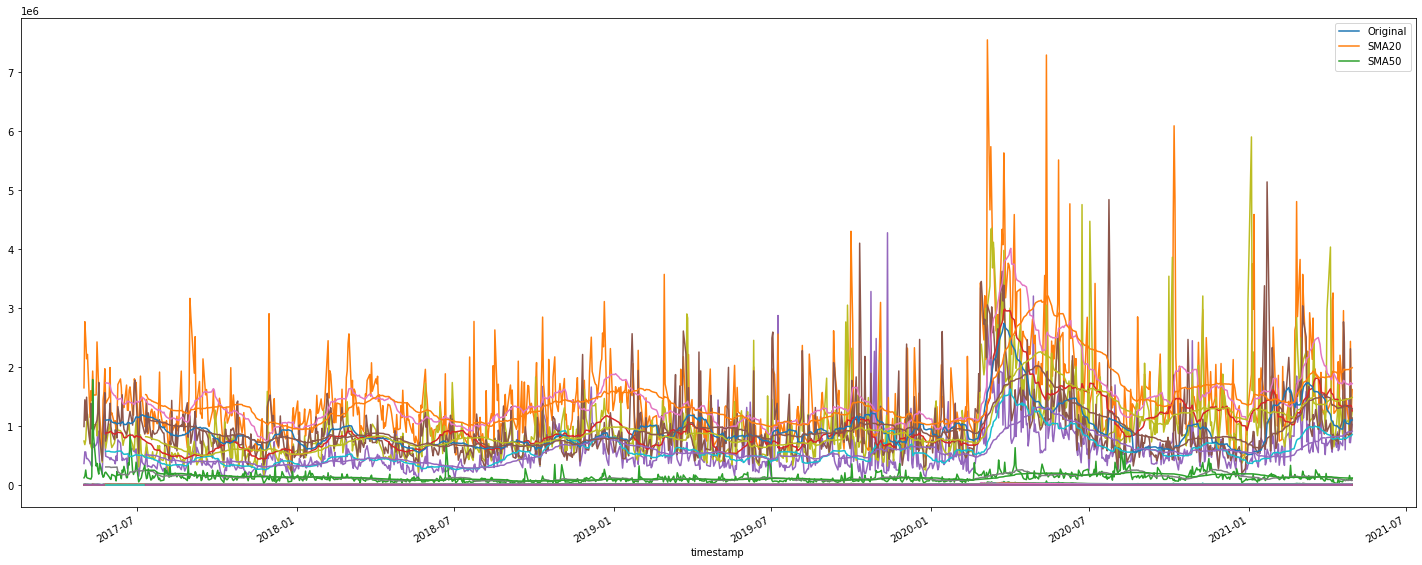

In [30]:
# Set figure of the daily closing prices of SHOP
ax = df_ticker.plot(figsize=(25,10))

# Overlay SMA20, SMA50, and SMA100 on the same figure
sma20.plot(ax=ax)
sma50.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Original", "SMA20", "SMA50"]);

In [31]:
from MCForecastTools import MCSimulation 

## Simulate five year portfolio growth with evenly-distributed stock investments


In [35]:
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.20,.20, .20, .20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

MC_even_dist.portfolio_data.head()

BMO                                           \
                            open   high    low  close  volume trade_count   
timestamp                                                                   
2017-05-01 04:00:00+00:00  71.05  71.31  70.53  70.53  363908        3874   
2017-05-02 04:00:00+00:00  70.52  70.52  69.60  69.91  562050        5152   
2017-05-03 04:00:00+00:00  69.67  70.27  69.47  69.83  557917        5284   
2017-05-04 04:00:00+00:00  69.96  70.00  69.33  69.37  446609        4331   
2017-05-05 04:00:00+00:00  69.44  70.73  69.44  70.54  448913        4378   

                                                      TD          ...  \
                                vwap daily_return   open    high  ...   
timestamp                                                         ...   
2017-05-01 04:00:00+00:00  70.877405          NaN  47.23  47.315  ...   
2017-05-02 04:00:00+00:00  69.892124    -0.008791  46.96  47.030  ...   
2017-05-03 04:00:00+00:00  69.833733    -0.001144  46.27  46.596  ...   
2017-05-04 04:00:00+00:00  69.567808    -0.006587  46.49  46.570  ...   
2017-05-05 04:00:00+00:00  70.306077     0.016866  46.06  46.970  ...   

                                  RY                  SP                  \
                                vwap daily_return   open   high      low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  68.490647          NaN  34.40  34.65  32.6819   
2017-05-02 04:00:00+00:00  67.673152    -0.009677  34.45  34.50  33.7000   
2017-05-03 04:00:00+00:00  67.520887     0.001629  35.00  36.20  31.8000   
2017-05-04 04:00:00+00:00  67.592467    -0.003252  32.35  32.50  31.3500   
2017-05-05 04:00:00+00:00  68.425861     0.018538  32.35  32.40  31.1500   

                                                                              
                           close  volume trade_count       vwap daily_return  
timestamp                                                                     
2017-05-01 04:00:00+00:00  34.30  120472        1111  34.393175          NaN  
2017-05-02 04:00:00+00:00  34.10  147899        1816  33.993852    -0.005831  
2017-05-03 04:00:00+00:00  32.35  253284        2723  33.055612    -0.051320  
2017-05-04 04:00:00+00:00  32.35  130255        1628  31.965233     0.000000  
2017-05-05 04:00:00+00:00  31.35  116969        1316  31.585767    -0.030912  

[5 rows x 40 columns]

## Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns


In [46]:
daily_returns = df_ticker.pct_change().dropna()
daily_returns

BMO                                          \
                               open      high       low     close    volume   
timestamp                                                                     
2017-05-02 04:00:00+00:00 -0.007460 -0.011078 -0.013186 -0.008791  0.544484   
2017-05-03 04:00:00+00:00 -0.012053 -0.003545 -0.001868 -0.001144 -0.007353   
2017-05-04 04:00:00+00:00  0.004162 -0.003842 -0.002015 -0.006587 -0.199506   
2017-05-05 04:00:00+00:00 -0.007433  0.010429  0.001587  0.016866  0.005159   
2017-05-08 04:00:00+00:00  0.016561  0.000283  0.009505 -0.000992 -0.128528   
...                             ...       ...       ...       ...       ...   
2021-04-26 04:00:00+00:00  0.020160  0.011800  0.020384  0.013016 -0.018455   
2021-04-27 04:00:00+00:00  0.014929  0.001908  0.005692  0.000637 -0.498506   
2021-04-28 04:00:00+00:00  0.001058  0.008677  0.007689  0.008702 -0.004753   
2021-04-29 04:00:00+00:00  0.010782  0.007029  0.009326  0.005576  0.209035   
2021-04-30 04:00:00+00:00 -0.012968 -0.012710 -0.013755 -0.012973  0.185064   

                                                       TD                      \
                          trade_count      vwap      open      high       low   
timestamp                                                                       
2017-05-02 04:00:00+00:00    0.329892 -0.013901 -0.005717 -0.006023 -0.014490   
2017-05-03 04:00:00+00:00    0.025621 -0.000835 -0.014693 -0.009228 -0.009946   
2017-05-04 04:00:00+00:00   -0.180356 -0.003808  0.004755 -0.000558  0.002621   
2017-05-05 04:00:00+00:00    0.010852  0.010612 -0.009249  0.008589 -0.000653   
2017-05-08 04:00:00+00:00   -0.146414  0.001731  0.019757  0.003385  0.018309   
...                               ...       ...       ...       ...       ...   
2021-04-26 04:00:00+00:00   -0.092546  0.015665  0.021752  0.011772  0.022525   
2021-04-27 04:00:00+00:00   -0.205089  0.001073  0.007540 -0.000884  0.001035   
2021-04-28 04:00:00+00:00    0.030986  0.007681  0.005136  0.011130  0.007384   
2021-04-29 04:00:00+00:00    0.147541  0.006470  0.011533  0.008251  0.012022   
2021-04-30 04:00:00+00:00    0.106169 -0.012577 -0.002598 -0.005457 -0.005215   

                           ...        RY                              SP  \
                           ...    volume trade_count      vwap      open   
timestamp                  ...                                             
2017-05-02 04:00:00+00:00  ...  0.457066    0.221267 -0.011936  0.001453   
2017-05-03 04:00:00+00:00  ... -0.241375   -0.100424 -0.002250  0.015965   
2017-05-04 04:00:00+00:00  ...  0.358432    0.281946  0.001060 -0.075714   
2017-05-05 04:00:00+00:00  ... -0.273795   -0.268054  0.012330  0.000000   
2017-05-08 04:00:00+00:00  ... -0.355218   -0.272154  0.003541 -0.038640   
...                        ...       ...         ...       ...       ...   
2021-04-26 04:00:00+00:00  ... -0.048673    0.009800  0.010344  0.025950   
2021-04-27 04:00:00+00:00  ...  0.023332    0.009171  0.001748  0.009335   
2021-04-28 04:00:00+00:00  ...  1.690720    0.320723  0.011450  0.032220   
2021-04-29 04:00:00+00:00  ... -0.636898   -0.261562  0.006898  0.015029   
2021-04-30 04:00:00+00:00  ...  0.353874    0.016903 -0.006370  0.011105   

                                                                               \
                               high       low     close    volume trade_count   
timestamp                                                                       
2017-05-02 04:00:00+00:00 -0.004329  0.031152 -0.005831  0.227663    0.634563   
2017-05-03 04:00:00+00:00  0.049275 -0.056380 -0.051320  0.712547    0.499449   
2017-05-04 04:00:00+00:00 -0.102210 -0.014151  0.000000 -0.485735   -0.402130   
2017-05-05 04:00:00+00:00 -0.003077 -0.006380 -0.030912 -0.102000   -0.191646   
2017-05-08 04:00:00+00:00 -0.024691 -0.011236  0.001595 -0.108259   -0.159574   
...                             ...       ...       ...       ...         ...

In [47]:
 # Calculate covariance of all daily returns of social media stocks vs. S&P 500
BMO_covariance = daily_returns["BMO"].cov(daily_returns["SP"])
TD_covariance = daily_returns["TD"].cov(daily_returns["SP"])
BNS_covariance = daily_returns["BNS"].cov(daily_returns["SP"])

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [37]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jahan\Downloads\Fintech-Project-1-master\Fintech-Project-1-master\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004493,0.986569,0.992266,1.006324,1.009805,0.995424,1.001632,1.005229,0.979022,0.978594,...,1.026704,0.995568,0.993676,0.981500,0.987311,1.002445,0.993866,1.007167,1.002723,0.992663
2,1.010947,0.984157,1.008126,1.008822,1.026423,0.981344,0.993252,0.999979,0.981391,0.980734,...,1.020779,1.007990,0.983593,0.977474,0.987031,1.002100,0.997721,1.018019,1.021021,0.983046
3,1.017499,0.982573,1.004457,1.006886,1.019720,0.990765,0.986196,1.008042,0.993472,0.982024,...,1.016093,1.011395,0.995270,0.975331,0.981485,1.006693,0.986800,1.017638,1.024180,0.973183
4,1.021609,0.970690,1.018201,1.010884,1.011295,0.990766,0.982836,1.022883,1.016032,0.977496,...,1.008753,1.018493,0.998002,0.977507,0.984033,1.011496,0.996893,1.030036,1.025383,0.983860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.458867,2.230030,1.970148,1.027480,2.012457,1.524713,1.480062,1.513453,1.992691,1.279951,...,2.251106,1.884736,1.675411,1.205580,1.091137,3.043309,1.376896,1.482501,1.720435,1.403576
1257,1.442727,2.206962,1.969020,1.018975,1.995247,1.523426,1.484231,1.518760,1.988235,1.281587,...,2.257564,1.878313,1.684145,1.206845,1.093449,3.047881,1.381616,1.460377,1.733531,1.403158
1258,1.435556,2.209827,1.957241,1.028378,2.003295,1.526634,1.484871,1.501865,1.990651,1.279312,...,2.306009,1.892696,1.698137,1.207140,1.100813,2.990634,1.376463,1.449251,1.734283,1.388888
1259,1.444685,2.229530,1.945338,1.027875,2.001838,1.544231,1.490507,1.488640,1.995156,1.280371,...,2.310869,1.907363,1.692315,1.205576,1.099912,3.002586,1.355108,1.453710,1.722857,1.378264


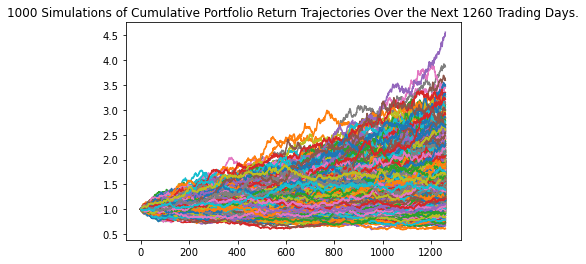

In [38]:
line_plot = MC_even_dist.plot_simulation()

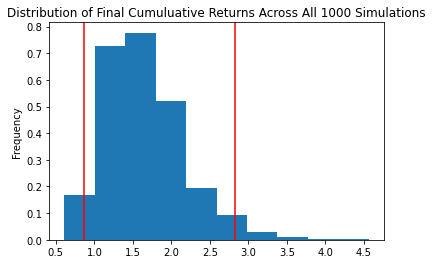

In [39]:
dist_plot = MC_even_dist.plot_distribution()

In [40]:
MC_sum = MC_even_dist.summarize_cumulative_return()
MC_sum

count           1000.000000
mean               1.648217
std                0.514532
min                0.609864
25%                1.261974
50%                1.578441
75%                1.935781
max                4.561622
95% CI Lower       0.870953
95% CI Upper       2.823781
Name: 1260, dtype: float64